In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [22]:

def calculate_entropy(series):
  value_counts = series.value_counts()
  probabilities = value_counts / len(series)
  entropy = -sum(p * math.log2(p) for p in probabilities if p > 0)
  return entropy

def calculate_information_gain(data, feature_column, target_column):
  total_entropy = calculate_entropy(data[target_column])
  weighted_conditional_entropy = 0
  for feature_value in data[feature_column].unique():
    subset = data[data[feature_column] == feature_value]
    probability_feature_value = len(subset) / len(data)
    conditional_entropy = calculate_entropy(subset[target_column])
    weighted_conditional_entropy += probability_feature_value * conditional_entropy

  information_gain = total_entropy - weighted_conditional_entropy
  return information_gain

def get_tval(df, test_column):
  var_a = df[df['delay'] == 1][test_column].var()
  var_b = df[df['delay'] == 0][test_column].var()
  mean_a = df[df['delay'] == 1][test_column].mean()
  mean_b = df[df['delay'] == 0][test_column].mean()
  n_a = len(df[df['delay'] == 1])
  n_b = len(df[df['delay'] == 0])
  t = (mean_a - mean_b) / math.sqrt((var_a / n_a) + (var_b / n_b))
  return t

In [2]:
df = pd.read_csv('flight_data.csv')

In [ ]:
df.columns

Index(['id', 'airline', 'plane', 'day', 'time', 'length', 'airportFrom',
       'airportTo', 'from_lat', 'from_long', 'from_elevation', 'to_lat',
       'to_long', 'to_elevation', 'from_region', 'to_region', 'rs_from',
       'rs_to', 'delay'],
      dtype='object')

In [ ]:
ignore_columns = ['id', 'delay']
categorical_columns = ['airline', 'plane', 'airportFrom', 'airportTo', 'from_region', 'to_region', 'rs_from', 'rs_to']
numerical_columns = ['time', 'length', 'day', 'from_lat', 'from_long', 'from_elevation', 'to_lat', 'to_long', 'to_elevation']

In [ ]:

information_gains = {}

for column in df.columns:
  if column in categorical_columns:
    ig = calculate_information_gain(df, column, 'delay')
    information_gains[column] = ig

print("Information Gain for each feature:")
for feature, gain in information_gains.items():
  print(f"{feature}: {gain:.4f}")

Information Gain for each feature:
airline: 0.0513
plane: 0.0437
day: 0.0015
airportFrom: 0.0254
airportTo: 0.0216
from_region: 0.0123
to_region: 0.0101
rs_from: 0.0037
rs_to: 0.0045


In [ ]:
t_vals = {}
for column in df.columns:
  if column in numerical_columns:
    t = get_tval(df, column)
    t_vals[column] = t
for feature, t in t_vals.items():
  print(f"{feature}: {t:.4f}")

-18.357859754737547
109.69042745993455
29.17168975888393
20.356744113132848
-16.814940458300764
7.754433268144516
-1.4592533760984356
-28.136155926524907
8.761665410512858
day: -18.3579
time: 109.6904
length: 29.1717
from_lat: 20.3567
from_long: -16.8149
from_elevation: 7.7544
to_lat: -1.4593
to_long: -28.1362
to_elevation: 8.7617


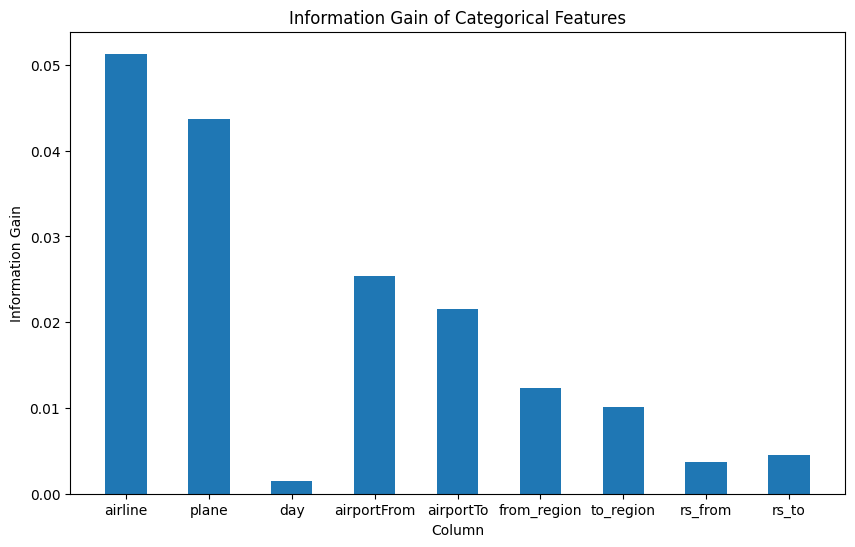

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
categories = list(information_gains.keys())
heights = list(information_gains.values())
plt.bar(categories, heights, width = 0.5)
plt.xlabel("Column")
plt.ylabel("Information Gain")
plt.title("Information Gain of Categorical Features")
plt.show()

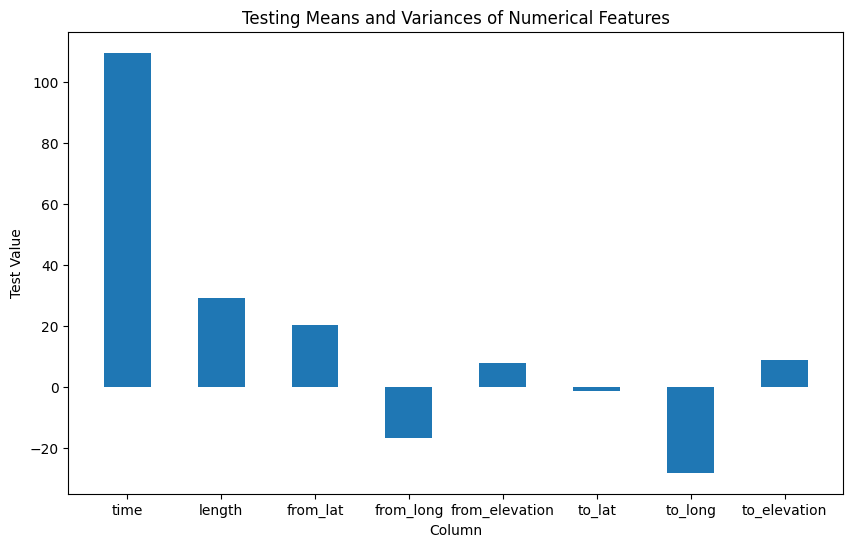

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
categories = list(t_vals.keys())
heights = list(t_vals.values())
plt.bar(categories, heights, width = 0.5)
plt.xlabel("Column")
plt.ylabel("Test Value")
plt.title("Testing Means and Variances of Numerical Features")
plt.figure(figsize=(10, 6))
plt.show()

In [3]:
columns = ['time', 'length', 'from_lat', 'from_elevation', 'to_elevation', 'airline', 'plane', 'airportFrom', 'airportTo', 'from_region', 'to_region']
categorical_columns = ['airline', 'airportFrom', 'airportTo', 'from_region', 'to_region']
X = df[columns]
y = df['delay']
encoder = LabelEncoder()
for column in categorical_columns:
  X[column] = encoder.fit_transform(df[[column]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipython-input-1147694695.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = encoder.fit_transform(df[[column]])
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipython-input-1147694695.py:7: SettingWithCopyWarning: 
A value is trying to be set on a 

In [8]:
X_train

,time,length,from_lat,from_elevation,to_elevation,airline,plane,airportFrom,airportTo,from_region,to_region
201329,525,148,46,31,1135,13,612,212,215,38,5
350326,1227,72,44,668,672,11,6563,169,206,23,15
312459,1075,70,33,1135,17,13,1197,215,241,5,6
368509,1270,75,37,62,56,14,1044,256,262,6,6
256447,750,109,27,30,1026,5,130,239,15,10,11
...,...,...,...,...,...,...,...,...,...,...,...
259178,900,75,34,236,1026,6,5139,46,15,41,11
365838,1095,174,41,984,1135,16,2716,203,215,30,5
131932,1255,355,26,8,125,1,1253,181,152,10,6
146867,1095,53,43,4452,4227,11,7766,218,259,14,45


## Logistic Regression Classifier

In [14]:
class LogisticRegressionClassifier:

  def __init__(self, epoch_max = 500, lr = 0.001):
    self.weights = []
    self.bias = 0
    self.max_epochs = epoch_max
    self.learning_rate = lr

  def _sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    for i in range(self.max_epochs):
      linear_model = np.dot(X, self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)
      dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
      db = (1 / n_samples) * np.sum(y_predicted - y)
      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db
    print(self.weights)

  def predict_proba(self, X):
      return self.sigmoid(np.dot(X, self.weights) + self.bias)

  def predict(self, X, threshold=0.5):
      probabilities = self.predict_proba(X)
      predictions = [1 if p >= threshold else 0 for p in probabilities]
      return np.array(predictions)


/tmp/ipython-input-1826731467.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipython-input-1826731467.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipython-input-1826731467.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipython-input-1826731467.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipython-input-1826731467.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipython-input-1826731467.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipython-input-1826731467.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipython-input-1826731467.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipython-input-1826731467.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/

[ 0.64598379 -0.53245443 -0.19082485  0.18871837  0.19789413  0.03206237
  0.64226114 -0.53770881 -0.17412343 -0.1769624  -0.21275016]
Logistic Regression
Accuracy: 0.449483601577643
Recall: 0.44931718380543356
Precision: 0.9993774820221101
F1 Score: 0.6199201065246338


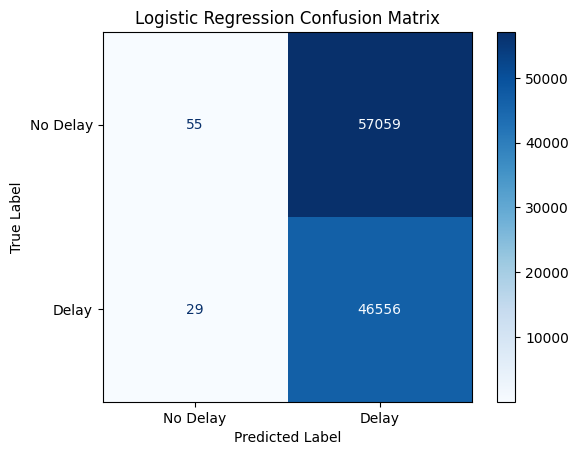

In [16]:
lr_model = LogisticRegressionClassifier()
lr_model.fit(X = X_train, y = y_train)
y_pred = lr_model.predict(X_test)

tp = 0
tn = 0
fn = 0
fp = 0
for i in range(len(y_pred)):
  if y_pred[i] == 1 and y_test.iloc[i] == 1:
    tp += 1
  elif y_pred[i] == 0 and y_test.iloc[i] == 0:
    tn += 1
  elif y_pred[i] == 1 and y_test.iloc[i] == 0:
    fn += 1
  elif y_pred[i] == 0 and y_test.iloc[i] == 1:
    fp += 1

accuracy = (tp+tn) / len(y_pred)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = 2 * (precision * recall) / (precision + recall)

print('Logistic Regression')
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Delay', 'Delay'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Naive Bayes Classifier

In [38]:
class NaiveBayesClassifier:

  def __init__(self):
    self.classes = []
    self.mean = []
    self.variance = []
    self.priors = []

  def fit(self, X, y):
    self.classes = np.unique(y)
    self.mean = np.zeros(len(self.classes))
    self.variance = np.zeros(len(self.classes))
    self.priors = np.zeros(len(self.classes))
    for c in self.classes:
      X_c = X[y == c]
      self.mean[c] = np.mean(X_c, axis=0)
      self.variance[c] = np.var(X_c, axis=0)
      self.priors[c] = len(X_c) / len(X)

  def _gaussian_pdf(self, X_row, class_mean, class_variance):
    exponent = -((X_row - class_mean)**2) / (2 * (class_variance + 1e-9))
    return (1 / np.sqrt(2 * np.pi * (class_variance + 1e-9))) * np.exp(exponent)

  def predict(self, X):
    predictions = []
    for i, x_row in X.iterrows():
      posteriors = []
      for c in self.classes:
          prior = self.priors[c]
          likelihood = np.prod(self._gaussian_pdf(x_row, self.mean[c], self.variance[c]))
          posterior = prior * likelihood
          posteriors.append(posterior)
      predictions.append(self.classes[np.argmax(posteriors)])
    return np.array(predictions)

Naive Bayes
Accuracy: 0.5884049026509417
Recall: 0.5550074696282098
Precision: 0.42266824085005905
F1 Score: 0.4798810655358144


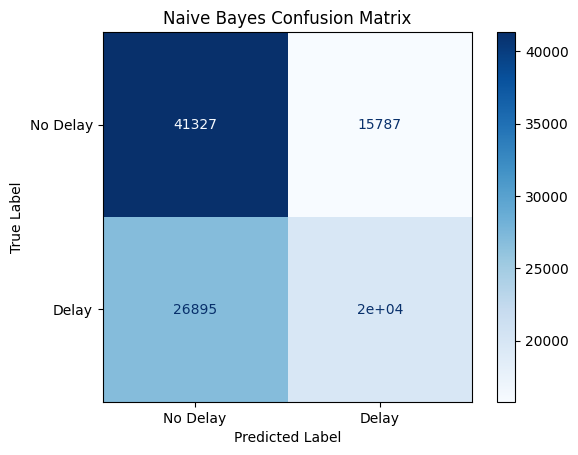

In [39]:
nb_model = NaiveBayesClassifier()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

tp = 0
tn = 0
fn = 0
fp = 0
for i in range(len(y_pred)):
  if y_pred[i] == 1 and y_test.iloc[i] == 1:
    tp += 1
  elif y_pred[i] == 0 and y_test.iloc[i] == 0:
    tn += 1
  elif y_pred[i] == 1 and y_test.iloc[i] == 0:
    fn += 1
  elif y_pred[i] == 0 and y_test.iloc[i] == 1:
    fp += 1

accuracy = (tp+tn) / len(y_pred)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = 2 * (precision * recall) / (precision + recall)

print('Naive Bayes')
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Delay', 'Delay'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Support Vector Classifier

In [9]:
class SupportVectorClassifier:
  def __init__(self, lr=0.0001, lambda_val=0.01, epochs=100):
    self.learning_rate = lr
    self.lambda_val = lambda_val
    self.max_epochs = epochs
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    num_samples, num_features = X.shape
    # Initialize weights and bias
    self.weights = np.zeros(num_features)
    self.bias = 0
    X_reset = X.reset_index(drop = True)
    # Transform y to -1 and 1
    y_transformed = np.where(y == 0, -1, 1)

    for n in range(self.max_epochs):
      print(n)
      for i, x_i in X_reset.iterrows():
        condition = y_transformed[i] * (np.dot(x_i, self.weights) - self.bias) >= 1
        if condition:
          self.weights -= self.learning_rate * (2 * self.lambda_val * self.weights)
        else:
          self.weights -= self.learning_rate * (2 * self.lambda_val * self.weights - np.dot(x_i, y_transformed[i]))
          self.bias -= self.learning_rate * y_transformed[i]
  def predict(self, X):
    estimate = np.dot(X, self.weights) + self.bias
    print(estimate)
    prediction = np.sign(estimate)
    return np.where(prediction == -1, 0, 1)

In [ ]:
sv_model = SupportVectorClassifier()
sv_model.fit(X_train, y_train)

y_pred = sv_model.predict(X_test)

tp = 0
tn = 0
fn = 0
fp = 0
for i in range(len(y_pred)):
  if y_pred[i] == 1 and y_test.iloc[i] == 1:
    tp += 1
  elif y_pred[i] == 0 and y_test.iloc[i] == 0:
    tn += 1
  elif y_pred[i] == 1 and y_test.iloc[i] == 0:
    fn += 1
  elif y_pred[i] == 0 and y_test.iloc[i] == 1:
    fp += 1

accuracy = (tp+tn) / len(y_pred)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = 2 * (precision * recall) / (precision + recall)

print('Support Vector Classifier')
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Delay', 'Delay'])
disp.plot(cmap=plt.cm.Blues)
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
